In [61]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [62]:
df = pd.read_csv('obeserved_data/exp.csv', index_col=False)
df['ratio'] = df['computation_time'] / df['communication_time']
# df = df.query('img_name=="index.csv"')
df = df.query('img_name=="8049.csv"')
p1 = df.query('P==1')['tot_time'].values[0]
df['speed_up'] = p1 / df['tot_time']
df = df.rename(columns={'tot_time':'total time (second)'})

df['efficiency'] = df['speed_up'] / df['P']

df

,P,total time (second),communication_time,computation_time,img_name,ratio,speed_up,efficiency
0,1,13.149863,NaN,NaN,8049.csv,NaN,1.000000,1.000000
1,2,8.437029,0.000604,8.436640,8049.csv,13967.947020,1.558589,0.779295
2,4,1.859047,0.001741,1.857719,8049.csv,1067.041356,7.073443,1.768361
3,8,0.587424,0.002392,0.585704,8049.csv,244.859532,22.385641,2.798205
4,16,0.206824,0.002891,0.204787,8049.csv,70.836043,63.579967,3.973748
5,32,0.205632,0.002606,0.203586,8049.csv,78.122026,63.948525,1.998391
6,64,0.210648,0.003427,0.208659,8049.csv,60.886781,62.425767,0.975403
7,128,0.175258,0.004246,0.172742,8049.csv,40.683467,75.031456,0.586183


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


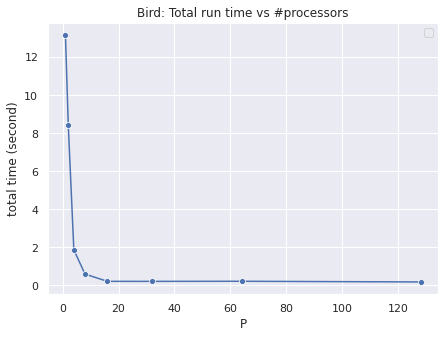

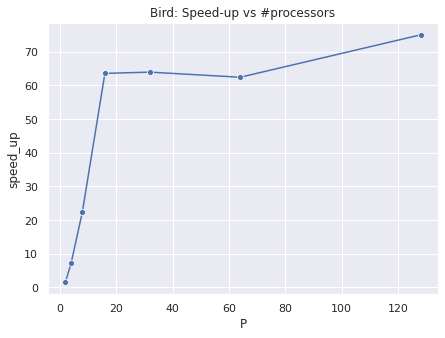

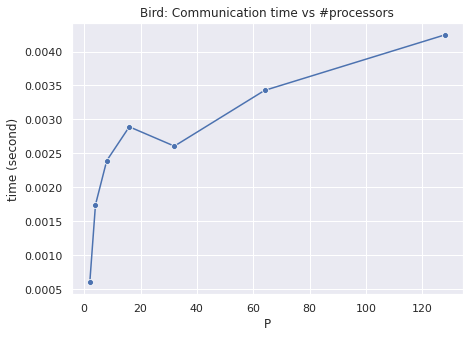

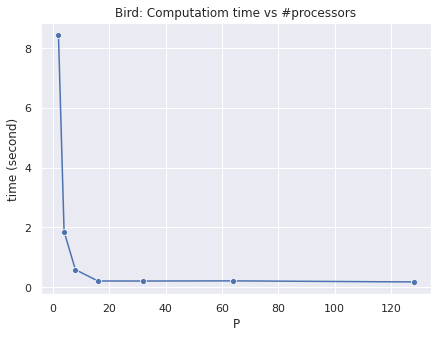

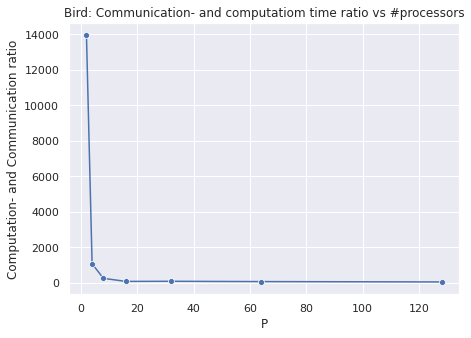

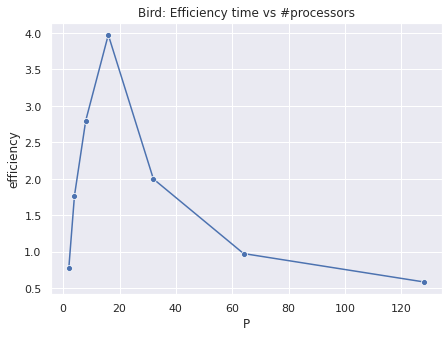

In [63]:
HEIGHT, LENGHT =7, 5
# Total_time curve
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Total run time vs #processors')
sns.set_theme()
sns.lineplot(data=df, x='P', y='total time (second)', marker='o')
plt.legend()
plt.savefig('figures/img8049_total_time.png')

# Speed-up
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Speed-up vs #processors')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='speed_up', marker='o')
plt.savefig('figures/img8049_speed_up.png')

# computation/communication
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Communication time vs #processors')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df.dropna(), x='P', y='communication_time', marker='o')
plt.savefig('figures/img8049_comm.png')

# computation/communication
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Computatiom time vs #processors')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df.dropna(), x='P', y='computation_time', marker='o')
plt.savefig('figures/img8049_comp.png')

# computation/communication ratio
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Communication- and computatiom time ratio vs #processors')
plt.ylabel('Computation- and Communication ratio')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='ratio', marker='o')#.set(yscale='log')
plt.savefig('figures/img8049_comp_comm_ratio.png')

# Efficiency
plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Bird: Efficiency time vs #processors')
sns.set_theme()
sns.lineplot(data=df.dropna(), x='P', y='efficiency', marker='o')
plt.savefig('figures/img8049_efficiency.png')

In [69]:
df = pd.read_csv('obeserved_data/startup.csv', index_col=False)

df['communication_time_pure'] = df['communication_time'] - df['startup']

df
# print(df.round(5).to_latex(index=False, header=True, bold_rows=True))

,P,tot_time,communication_time,computation_time,startup,img_name,px,width,communication_time_pure
0,64,0.152528,0.003024,0.149525,0.000686,index_down_10,28085,137,0.002338
1,64,0.229850,0.003523,0.227229,0.000781,index_down_20,111930,273,0.002742
2,64,0.355212,0.003920,0.352131,0.000984,index_down_30,251740,410,0.002936
3,64,0.726972,0.005156,0.723027,0.001340,index_down_40,447174,546,0.003816
4,64,1.176919,0.003817,1.173655,0.001518,index_down_50,699392,683,0.002299
5,64,2.225262,0.004708,2.221449,0.002053,index_down_60,1007780,820,0.002655
6,64,3.661109,0.005649,3.656394,0.002847,index_down_70,1370904,956,0.002802
7,64,5.771907,0.006625,5.766120,0.003510,index_down_80,1790334,1093,0.003115
8,64,9.094730,0.007873,9.088299,0.004411,index_down_90,2265047,1229,0.003462
9,64,3.651570,0.009008,3.643721,0.005313,index,2797568,1366,0.003695


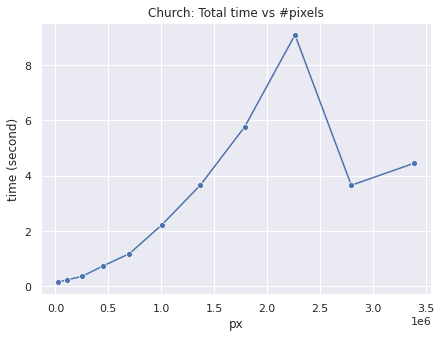

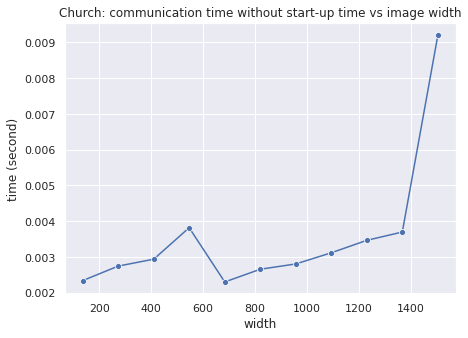

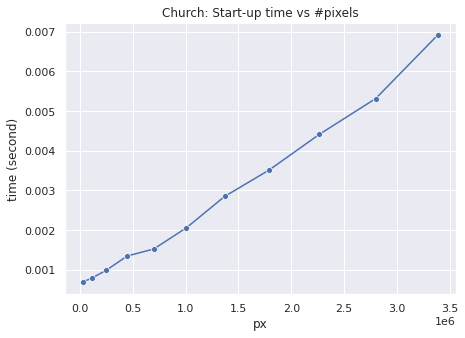

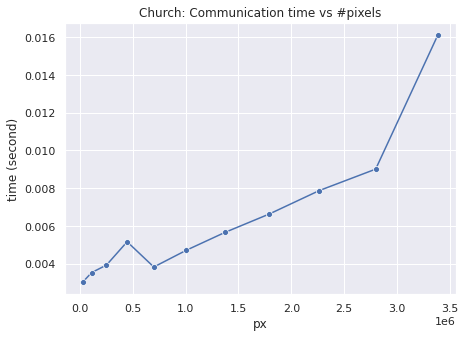

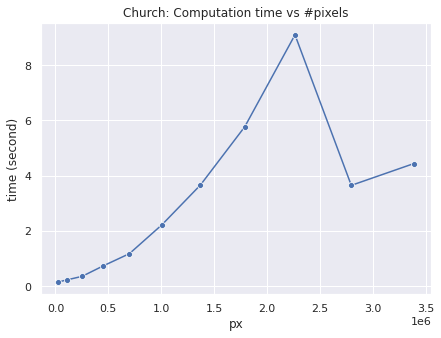

In [73]:

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Total time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='tot_time', marker='o')
plt.savefig('figures/img_index_total.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: communication time without start-up time vs image width')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='width', y='communication_time_pure', marker='o')
plt.savefig('figures/img_index_comm_without_startup.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Start-up time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='startup', marker='o')
plt.savefig('figures/img_index_starup.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Communication time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='communication_time', marker='o')
plt.savefig('figures/img_index_communication.png')

plt.figure(figsize=(HEIGHT, LENGHT))
plt.title('Church: Computation time vs #pixels')
sns.set_theme()
plt.ylabel('time (second)')
sns.lineplot(data=df, x='px', y='computation_time', marker='o')
plt.savefig('figures/img_index_computation.png')